# Proyek Analisis Data: E-commerce
- **Nama:** Deva Athaya Aryaputra
- **Email:** devathaya2016@gmail.com
- **ID Dicoding:** Deva Athaya Aryaputra

## Menentukan Pertanyaan Bisnis

- Kota dan state apa yang memiliki jumlah customer terbanyak
- Produk mana yang paling banyak terjual

## Import Semua Packages/Library yang Digunakan

In [458]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [338]:
customer_df = pd.read_csv("customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [339]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [340]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [341]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [342]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [343]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [344]:
product_category_df = pd.read_csv("product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [345]:
product_df = pd.read_csv("products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [346]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Kita telah melihat isi dari tiap csv 

### Assessing Data

#### Menilai tabel `customers_df`

In [347]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [348]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

customer_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [349]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [350]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_items_df`

In [351]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [352]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [353]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [354]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [355]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [356]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [357]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [358]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [359]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_df`    

In [360]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [361]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `product_df`  

In [362]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [363]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [364]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df` 

In [365]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [366]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Pada data, terdapat beberapa anomali seperti duplicate, missing value, dan inacurrate data type yang akan kita bersihkan pada cleaning nanti

### Cleaning Data

#### Membersihkan tabel `geolocation_df`


#### Duplicate data

In [367]:
geolocation_df.duplicated().sum()

261831

In [368]:
geolocation_df.drop_duplicates(inplace=True)

In [369]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan tabel `order_items_df`


#### Memperbaiki tipe data

In [370]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [371]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `orders_df`

#### Memperbaiki tipe data

In [372]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "order_approved_at"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [373]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Missing value

In [374]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Memperbaiki missing value pada order_approved_at

In [375]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [376]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [377]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True)

#### Memperbaiki missing value pada order_delivered_carrier_date

In [378]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [379]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [380]:
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)

#### Memperbaiki missing value pada order_delivered_customer_date

In [381]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-05-09 15:48:00,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-05-09 15:48:00,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-05-09 15:48:00,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,2018-05-09 15:48:00,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-05-09 15:48:00,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,2018-05-09 15:48:00,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-05-09 15:48:00,NaT,2017-09-15


In [382]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [383]:
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 23:38:46", inplace=True)

In [384]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan tabel product_df

#### Missing value

In [385]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Memperbaiki missing value pada product_category_name

In [386]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [387]:
product_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [388]:
product_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

#### Memperbaiki missing value pada product_name_lenght

In [389]:
product_df[product_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [390]:
product_df.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [391]:
product_df.product_name_lenght.fillna(value="60.0", inplace=True)

#### Memperbaiki missing value pada product_description_lenght

In [392]:
product_df[product_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [393]:
product_df.product_description_lenght.value_counts()

product_description_lenght
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: count, Length: 2960, dtype: int64

In [394]:
product_df.product_description_lenght.fillna(value="404.0", inplace=True)

#### Memperbaiki missing value pada product_photos_qty

In [395]:
product_df[product_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [396]:
product_df.product_photos_qty.value_counts()

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [397]:
product_df.product_photos_qty.fillna(value="1.0", inplace=True)

##### Memperbaiki missing value pada product_weight_g

In [398]:
product_df[product_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,NaN,NaN,NaN,NaN


In [399]:
product_df.product_weight_g.value_counts()

product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: count, Length: 2204, dtype: int64

In [400]:
product_df.product_weight_g.fillna(value="200.0", inplace=True)

#### Memperbaiki missing value pada product_length_cm 

In [401]:
product_df[product_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,NaN,NaN,NaN


In [402]:
product_df.product_length_cm.value_counts()

product_length_cm
16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: count, Length: 99, dtype: int64

In [403]:
product_df.product_length_cm.fillna(value="16.0", inplace=True)

#### Memperbaiki missing value pada product_height_cm

In [404]:
product_df[product_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,NaN,NaN


In [405]:
product_df.product_height_cm.value_counts()

product_height_cm
10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: count, Length: 102, dtype: int64

In [406]:
product_df.product_height_cm.fillna(value="10.0", inplace=True)

#### Memperbaiki missing value pada product_width_cm

In [407]:
product_df[product_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,NaN


In [408]:
product_df.product_width_cm.value_counts()

product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: count, Length: 95, dtype: int64

In [409]:
product_df.product_width_cm.fillna(value="11.0", inplace=True)

In [410]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Anomali pada data telah dibersihkan menggunakan beberapa metode seperti dropping untuk menghilangkan duplicate dan imputation untuk missing value

## Exploratory Data Analysis (EDA)

### Explore customer

In [429]:
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
826,b0bde8961b359e3e4840c9327862f43e,40b1c1468c27787235deb9bf979fd51d,2804,sao paulo,SP
66190,f296f88c13ab7f40770c56810e4fcfcb,8ea8c30fa60f3775211c6ca2c7a9f068,14940,ibitinga,SP
30793,614f4db4fc76b38bf6691690a5c87dcf,3b0bb03a1592b488c3a77d5f6ddc06ac,88310,itajai,SC
78283,b9c84df370dea836ec452ed49cca4c78,340031e96a08c8ef82c884b9348b9dc9,11065,santos,SP
69068,d1cbcc4df0dfd5cf07dd4aa96816742a,22d6b22d92436243002afc285267cd48,22220,rio de janeiro,RJ
182,019200fa574c9eda0fbc82c71fcc8fbe,7530369a1ddf13882910895b0559423d,3951,sao paulo,SP
52291,1c37132d043014c19670796be17b81cc,920ad49c4269296bc149e5baaccdea37,40150,salvador,BA
54921,2fee49377a6cc2afe9eedf9f9135d1be,6e8a7be1f3d09d448ddb2c78f40d1bdb,26225,nova iguacu,RJ
46519,0c562074c5f964adc5bcfa39d647a834,bfec92e1ec04145002c3827e2246afd1,79830,dourados,MS
27122,4dd3a0f00eda9c4ec8d3b86cf231823c,edd2329bf3243402e14e0779270088c6,85550,coronel vivida,PR


In [412]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [413]:
customer_df.customer_id.is_unique

True

In [414]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [415]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

#### Explore geolocation

In [428]:
geolocation_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
148299,6060,-23.550914,-46.779437,osasco,SP
590712,35390,-20.456623,-42.671918,jequeri,MG
646972,38400,-18.908951,-48.278111,uberlandia,MG
457125,22795,-23.015918,-43.456590,rio de janeiro,RJ
953126,92340,-29.898841,-51.180625,canoas,RS
257904,11680,-23.575140,-45.272782,ubatuba,SP
45276,3181,-23.558959,-46.582024,sao paulo,SP
786508,71979,-15.869530,-48.019364,brasília,DF
327422,14080,-21.152865,-47.804397,ribeirao preto,SP
822262,78180,-15.865090,-56.079301,santo antonio do leverger,MT


In [430]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


#### Merge customer dengan geolocation

In [433]:
customer_geo_df = pd.merge(
    left=customer_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customer_geo_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


#### Explore product

In [416]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21390,c025fc620500ff6e9d4a169cb7aff42d,automotivo,59.0,463.0,2.0,500.0,32.0,16.0,16.0
2005,c8666b79d968dd8ed08d31e4fc58fb93,perfumaria,45.0,158.0,1.0,100.0,16.0,16.0,11.0
6872,553c5116d8f8866d39a1281071b3776f,moveis_decoracao,43.0,149.0,1.0,500.0,20.0,10.0,15.0
15049,9d2aec014bec7cd8ece6fbf4e6709326,moveis_decoracao,55.0,203.0,1.0,900.0,40.0,2.0,30.0
17165,2dc0d95288983b8c91627bab326284ae,beleza_saude,48.0,515.0,1.0,3100.0,30.0,12.0,16.0
11783,77f11bb30ec0116ada15b3ff106b744d,telefonia,53.0,880.0,1.0,200.0,18.0,5.0,12.0
13466,158566f2cfb3fd58a3770bc26f530f41,bebes,54.0,134.0,1.0,822.0,35.0,6.0,31.0
6309,6631e618f60618adc0361b7ab843c98d,informatica_acessorios,60.0,872.0,1.0,820.0,48.0,8.0,28.0
10620,2b19dbb6e225fc04cf9a80d83f949b88,cama_mesa_banho,68.0,318.0,1.0,21200.0,45.0,15.0,25.0
10556,e06eb527f0a6ce904044687bd2faa582,utilidades_domesticas,42.0,223.0,2.0,800.0,46.0,10.0,35.0


In [417]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


#### Explore order_items

In [418]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
96800,dbaaa77999c0f5d953d543efe0f080f9,1,99e57d3d6efd7ba6f8eaf59bf456179e,2199e7fe213c16213bf5d6a7eadc9a5d,2017-07-24 18:25:19,22.62,12.69
76198,ad807dc9b0ee5724709ced19ab71525a,1,af8533a77adce26dca87480c4c5c9af4,f5a590cf36251cf1162ea35bef76fe84,2017-06-29 02:30:31,699.00,39.67
10414,17d018174e8bb3a09152f926cc684ad2,1,abe236a52dbc43e90bad00fe6d794582,6426d21aca402a131fc0a5d0960a3c90,2017-08-08 16:30:19,59.90,16.18
45021,665c70dad359d52a11ec77814605ab19,1,50e1b118f266b655f613f753914c42db,1835b56ce799e6a4dc4eddc053f04066,2018-05-11 17:56:53,39.99,19.32
87173,c5ee827414d58af8ca34c4911be51911,1,cad2db5e318d7283a234c517b2f28a42,8160255418d5aaa7dbdc9f4c64ebda44,2018-02-08 15:30:20,105.90,13.08


In [419]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


#### Explore orders

In [421]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
27880,6371383f8c6f8a72ff10050cf92adab6,41bed71284d7cc85ac0654ffaffdb186,delivered,2018-03-26 06:27:13,2018-03-26 06:47:48,2018-03-27 01:54:23,2018-04-03 22:48:35,2018-04-23
7398,97b4d83323a5917d5df6ff4581daaaec,7f89f97dcd89a2822583cfb3ab874788,delivered,2018-02-28 10:35:28,2018-02-28 10:55:37,2018-02-28 22:58:47,2018-03-07 21:07:55,2018-03-23
45921,2429083883078c31cf2337ce0dd425ee,5aa462ca54e8b4d65747f7987eb80e25,unavailable,2017-07-06 19:25:55,2017-07-07 19:35:08,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-08-08
62498,a4f3326bf1a1c3e11d17f3680f1e6337,07fbc7cbc612a13023ce69a6573ddf2d,delivered,2017-08-30 18:41:51,2017-08-30 18:55:11,2017-09-01 16:08:04,2017-09-06 22:39:59,2017-09-18
30923,ae0c255a73ce7465486f62fb5f79953a,1cf59e965ef313acb7995db312a61740,delivered,2017-12-10 18:33:56,2017-12-10 18:50:10,2017-12-14 17:41:53,2018-01-09 20:29:23,2018-01-08


In [422]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-07 03:30:45.390211072,2018-01-17 22:04:34.785078784,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-09 15:48:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### Merge orders dengan order_items

In [424]:
orders_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_items_df .head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


#### Merge hasil sebelumnya dengan products

In [427]:
orders_items_products_df = pd.merge(
    left=orders_items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_items_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota dan state mana yang memiliki customer paling banyak?

In [438]:
city_state_customer_count = customer_geo_df.groupby(['customer_city', 'customer_state'])['customer_id'].nunique().reset_index()
city_state_customer_count = city_state_customer_count.sort_values('customer_id', ascending=False)
top_10_cities = city_state_customer_count.head(10)

top_10_cities = top_10_cities.rename(columns={'customer_id': 'customer_count'})

print("Top 10 cities and states with the most customers:")
print(top_10_cities)

Top 10 cities and states with the most customers:
              customer_city customer_state  customer_count
3758              sao paulo             SP           15540
3281         rio de janeiro             RJ            6882
469          belo horizonte             MG            2773
587                brasilia             DF            2131
1187               curitiba             PR            1521
739                campinas             SP            1444
3080           porto alegre             RS            1379
3375               salvador             BA            1245
1587              guarulhos             SP            1189
3574  sao bernardo do campo             SP             938


#### Grafik

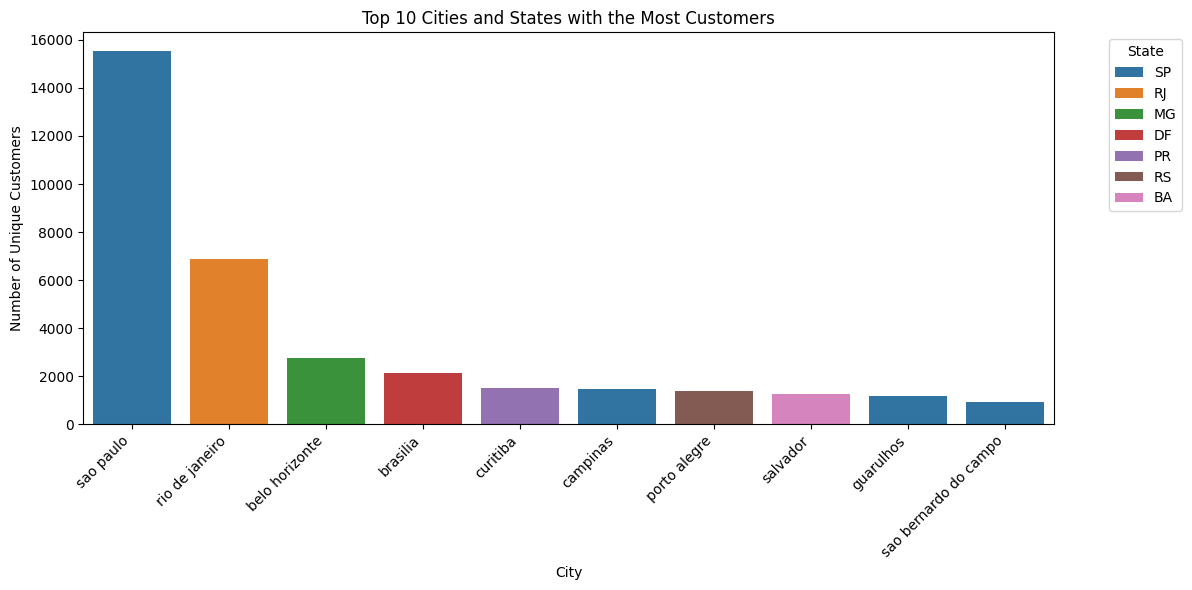

In [439]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='customer_count', hue='customer_state', data=top_10_cities)
plt.title('Top 10 Cities and States with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa produk yang memiliki penjualan terbanyak?

In [448]:
merged_df = pd.merge(order_items_df, product_df, on='product_id')
product_sales = merged_df.groupby('product_id').agg({
    'order_item_id': 'count',
    'product_category_name': 'first',
    'price': 'sum'
}).reset_index()

product_sales.columns = ['product_id', 'total_sales', 'category', 'total_revenue']
product_sales_sorted = product_sales.sort_values('total_sales', ascending=False)
top_10_products = product_sales_sorted.head(10)

print("Top 10 products with the most sales:")
print(top_10_products)

Top 10 products with the most sales:
                             product_id  total_sales                category  \
22112  aca2eb7d00ea1a7b8ebd4e68314663af          527        moveis_decoracao   
19742  99a4788cb24856965c36a24e339b6058          488         cama_mesa_banho   
8613   422879e10f46682990de24d770e7f83d          484      ferramentas_jardim   
7364   389d119b48cf3043d311335e499d9c6b          392      ferramentas_jardim   
7079   368c6c730842d78016ad823897a372db          388      ferramentas_jardim   
10840  53759a2ecddad2bb87a079a1f1519f73          373      ferramentas_jardim   
27039  d1c427060a0f73f6b889a5c7c61f2ac4          343  informatica_acessorios   
10867  53b36df67ebb7c41585e8d54d6772e08          323      relogios_presentes   
2794   154e7e31ebfa092203795c972e5804a6          281            beleza_saude   
8051   3dd2a17168ec895c781a9191c1e95ad7          274  informatica_acessorios   

       total_revenue  
22112       37608.90  
19742       43025.56  
8613        2

#### Grafik

C:\Users\USER\AppData\Local\Temp\ipykernel_5272\3829686491.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


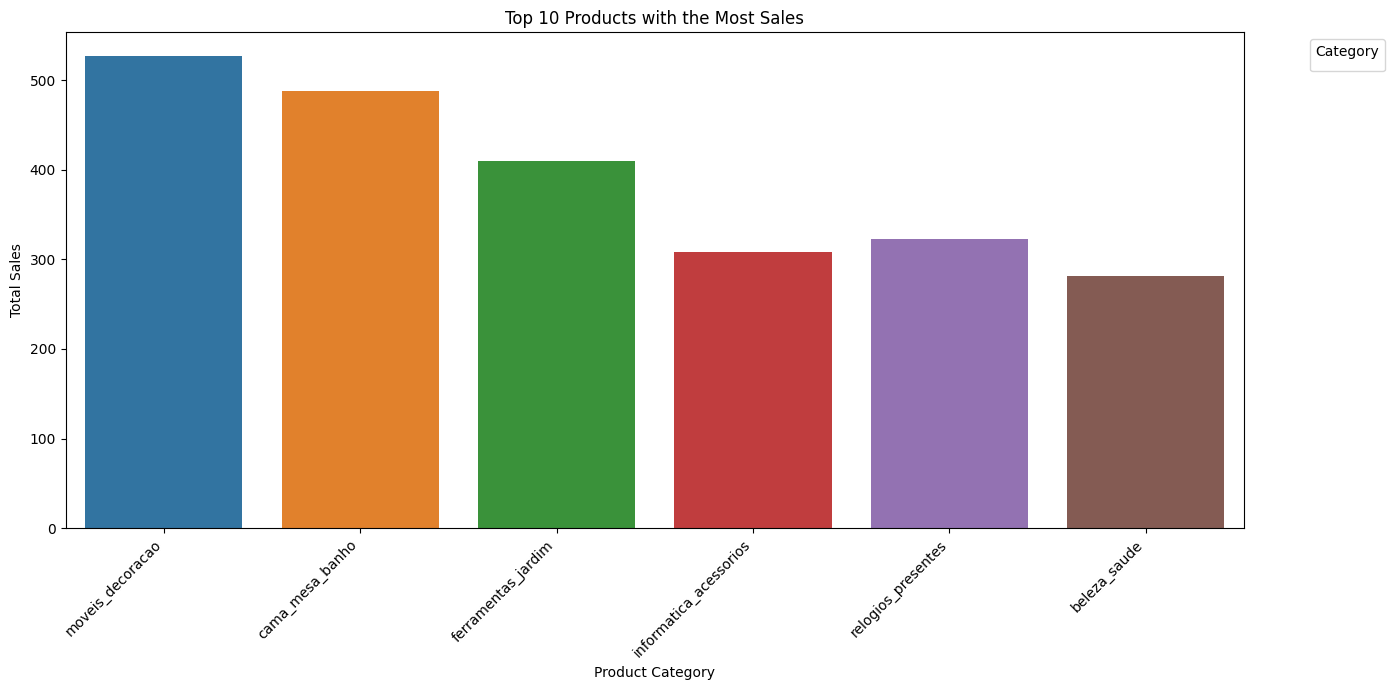

In [456]:
plt.figure(figsize=(14, 7))
sns.barplot(x=label_column, y='total_sales', hue='category', data=top_10_products, errorbar=None)
plt.title('Top 10 Products with the Most Sales')
plt.xlabel('Product Name' if label_column == 'product_name' else 'Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight:**
- Berikut adalah explanatory analyst dan visualization untuk menjawab pertanyaan bisnis

## Analisis Lanjutan (Opsional)

#### Binning

In [472]:
customers_per_city = customer_df.groupby('customer_city').size().reset_index(name='customer_count')
customers_per_city['customer_count_bin'] = pd.qcut(customers_per_city['customer_count'], 
                                                   q=3, 
                                                   labels=['Low', 'Medium', 'High'],
                                                   duplicates='drop')

In [473]:
product_sales = order_items_df.groupby('product_id').size().reset_index(name='total_sales')

In [474]:
bins = [0]
for q in [0.25, 0.5, 0.75]:
    bins.append(product_sales['total_sales'].quantile(q))
bins.append(product_sales['total_sales'].max())
bins = sorted(set(bins))  # Menghapus nilai duplikat dan mengurutkan

labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
if len(bins) - 1 != len(labels):
    labels = [f'Group {i+1}' for i in range(len(bins)-1)]

product_sales['sales_bin'] = pd.cut(product_sales['total_sales'], bins=bins, labels=labels, include_lowest=True)

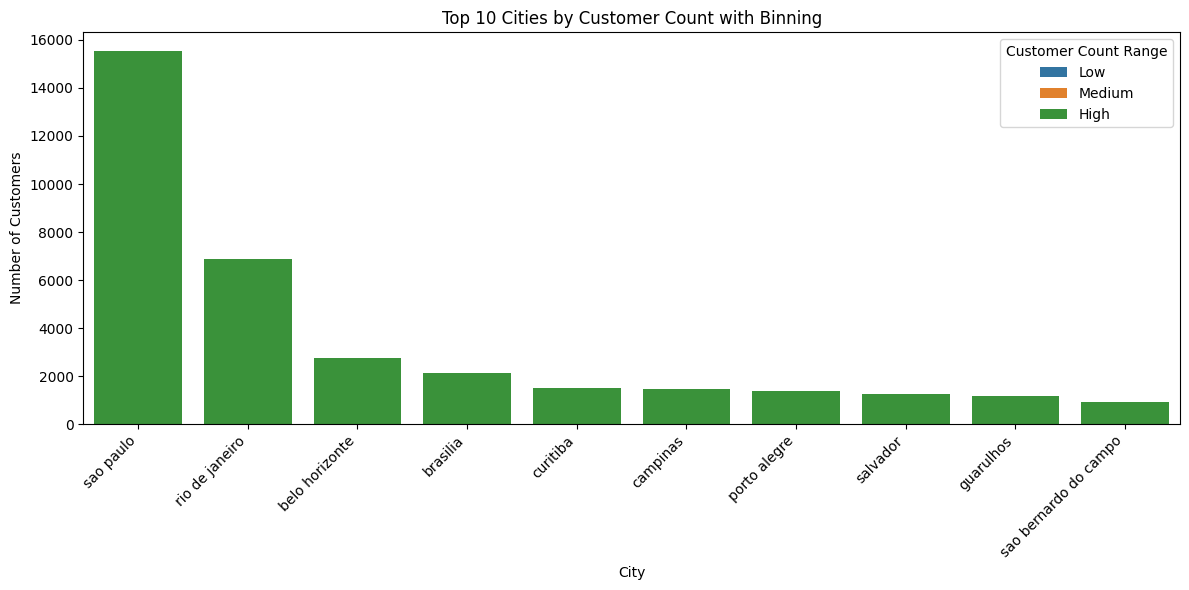

In [475]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='customer_count', hue='customer_count_bin', 
            data=customers_per_city.nlargest(10, 'customer_count'))
plt.title('Top 10 Cities by Customer Count with Binning')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Count Range')
plt.tight_layout()
plt.show()

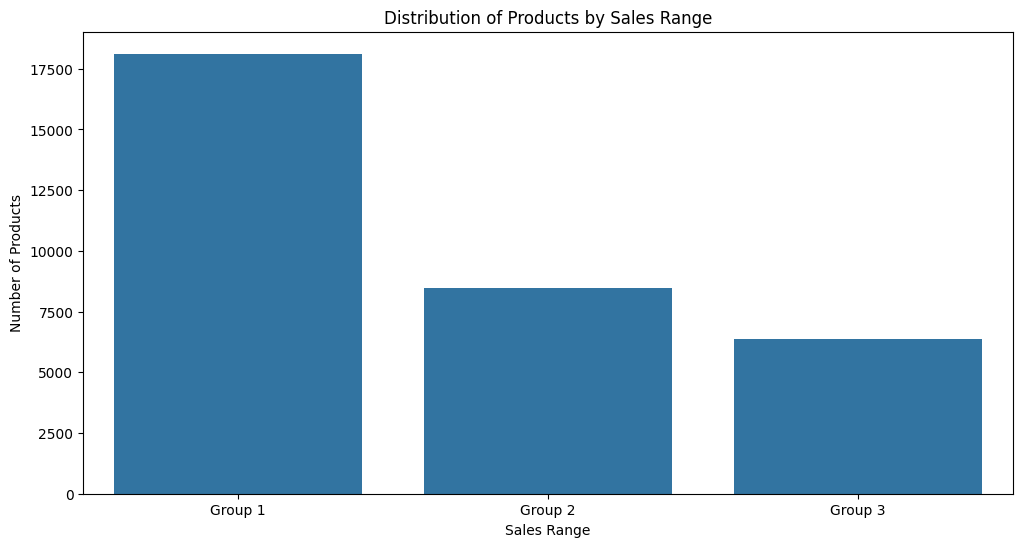

In [476]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sales_bin', data=product_sales)
plt.title('Distribution of Products by Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Number of Products')
plt.show()

In [478]:
if 'price' in product_df.columns:
    price_bins = [0]
    for q in [0.25, 0.5, 0.75]:
        price_bins.append(products_df['price'].quantile(q))
    price_bins.append(products_df['price'].max())
    price_bins = sorted(set(price_bins))
    
    price_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
    if len(price_bins) - 1 != len(price_labels):
        price_labels = [f'Group {i+1}' for i in range(len(price_bins)-1)]
    
    products_df['price_bin'] = pd.cut(products_df['price'], bins=price_bins, labels=price_labels, include_lowest=True)
    plt.figure(figsize=(12, 6))
    sns.countplot(x='price_bin', data=products_df)
    plt.title('Distribution of Products by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Products')
    plt.show()

In [479]:
print("\nTop 10 Cities by Customer Count:")
print(customers_per_city.nlargest(10, 'customer_count')[['customer_city', 'customer_count', 'customer_count_bin']])

print("\nProduct Sales Distribution:")
print(product_sales['sales_bin'].value_counts().sort_index())

if 'price' in product_df.columns:
    print("\nProduct Price Distribution:")
    print(product_df['price_bin'].value_counts().sort_index())


Top 10 Cities by Customer Count:
              customer_city  customer_count customer_count_bin
3597              sao paulo           15540               High
3155         rio de janeiro            6882               High
453          belo horizonte            2773               High
558                brasilia            2131               High
1143               curitiba            1521               High
707                campinas            1444               High
2964           porto alegre            1379               High
3247               salvador            1245               High
1529              guarulhos            1189               High
3428  sao bernardo do campo             938               High

Product Sales Distribution:
sales_bin
Group 1    18117
Group 2     8468
Group 3     6366
Name: count, dtype: int64


#### Manual Grouping

In [487]:
top_10_cities = customer_df.groupby(['customer_city', 'customer_state']).size().reset_index(name='customer_count')
top_10_cities = top_10_cities.nlargest(10, 'customer_count')

def city_group(count):
    if count > 5000:
        return 'High'
    elif count > 1000:
        return 'Medium'
    else:
        return 'Low'

top_10_cities['city_rank'] = top_10_cities['customer_count'].apply(city_group)

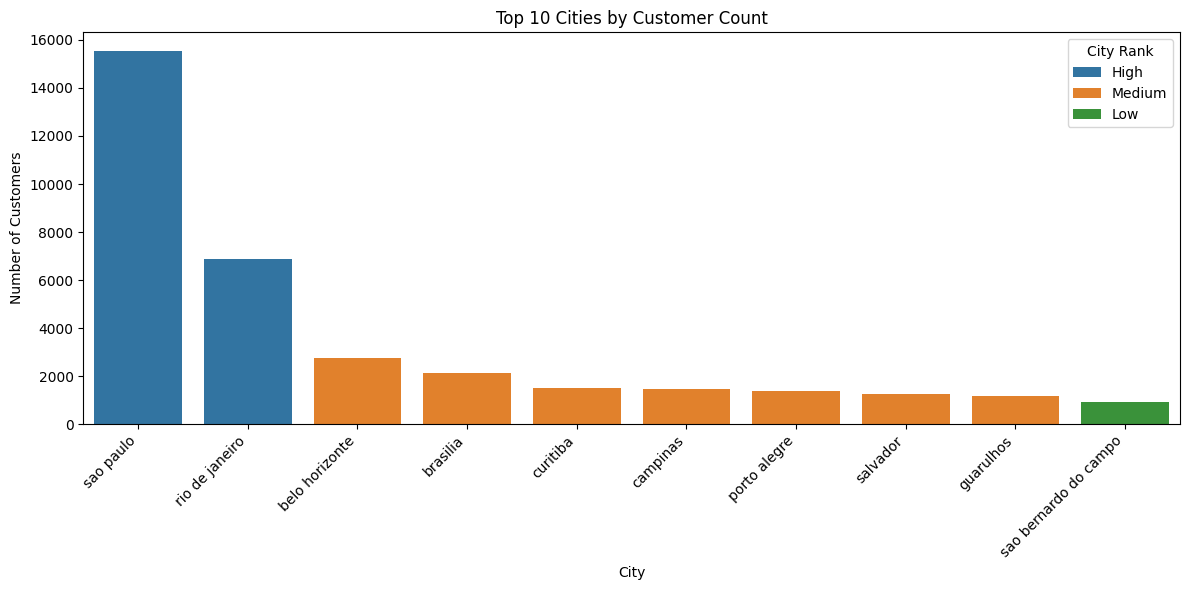

In [488]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='customer_count', hue='city_rank', data=top_10_cities)
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City Rank')
plt.tight_layout()
plt.show()

In [497]:
product_sales = order_items_df.groupby('product_id').size().reset_index(name='total_sales')
product_sales = product_sales.merge(product_df[['product_id', 'product_category_name']], on='product_id', how='left')
top_10_products = product_sales.nlargest(10, 'total_sales')

# Fungsi untuk mengelompokkan produk menjadi 3 kategori
def product_group(sales):
    if sales >= top_10_products['total_sales'].quantile(0.67):
        return 'High'
    elif sales >= top_10_products['total_sales'].quantile(0.33):
        return 'Medium'
    else:
        return 'Low'

top_10_products['sales_rank'] = top_10_products['total_sales'].apply(product_group)

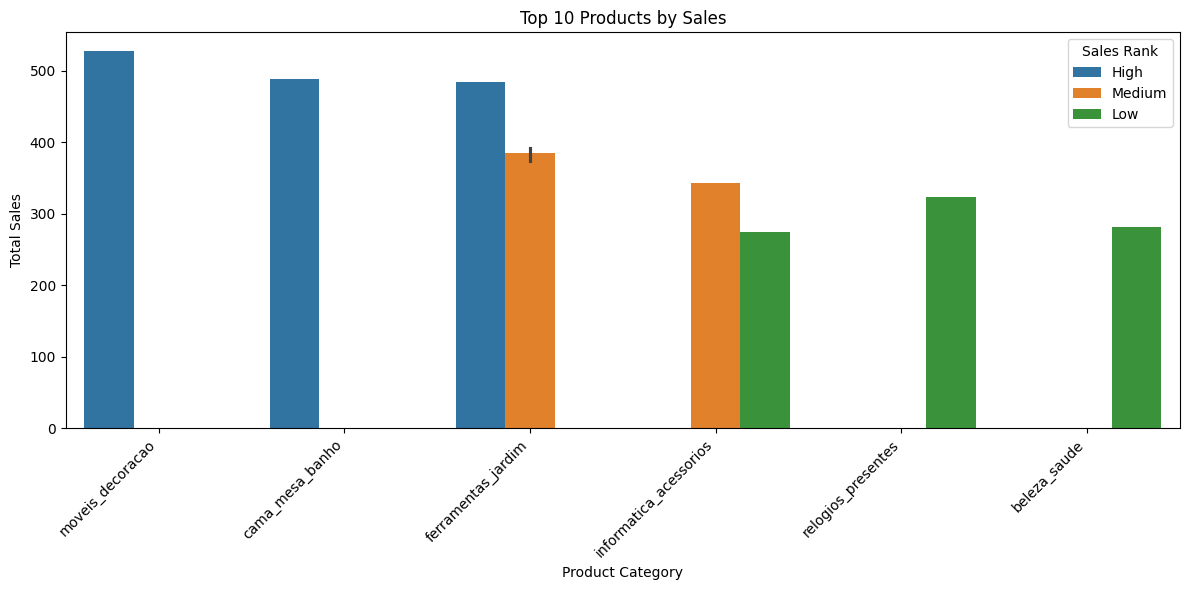

In [505]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='total_sales', hue='sales_rank', data=top_10_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales Rank')
plt.tight_layout()
plt.show()

In [501]:
print("\nTop 10 Cities by Customer Count:")
print(top_10_cities[['customer_city', 'customer_state', 'customer_count', 'city_rank']])

print("\nTop 10 Products by Sales:")
print(top_10_products[['product_category_name', 'total_sales', 'sales_rank']])


Top 10 Cities by Customer Count:
              customer_city customer_state  customer_count city_rank
3758              sao paulo             SP           15540      High
3281         rio de janeiro             RJ            6882      High
469          belo horizonte             MG            2773    Medium
587                brasilia             DF            2131    Medium
1187               curitiba             PR            1521    Medium
739                campinas             SP            1444    Medium
3080           porto alegre             RS            1379    Medium
3375               salvador             BA            1245    Medium
1587              guarulhos             SP            1189    Medium
3574  sao bernardo do campo             SP             938       Low

Top 10 Products by Sales:
        product_category_name  total_sales sales_rank
22112        moveis_decoracao          527       High
19742         cama_mesa_banho          488       High
8613       ferrame

#### Kesimpulan

- Kota yang memiliki costumer paling banyak adalah sao paulo
- Barang yang paling banyak terjual adalah movies_decoracao 

In [507]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import base64
from io import BytesIO

# Data untuk Top 10 Cities
top_10_cities_data = {
    'customer_city': ['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'campinas', 'porto alegre', 'salvador', 'guarulhos', 'sao bernardo do campo'],
    'customer_state': ['SP', 'RJ', 'MG', 'DF', 'PR', 'SP', 'RS', 'BA', 'SP', 'SP'],
    'customer_count': [15540, 6882, 2773, 2131, 1521, 1444, 1379, 1245, 1189, 938],
    'city_rank': ['High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low']
}

top_10_cities_df = pd.DataFrame(top_10_cities_data)
top_10_cities_df.to_csv('top_10_cities.csv', index=False)

# Data untuk Top 10 Products
top_10_products_data = {
    'product_category_name': ['moveis_decoracao', 'cama_mesa_banho', 'ferramentas_jardim', 'ferramentas_jardim', 'ferramentas_jardim', 'ferramentas_jardim', 'informatica_acessorios', 'relogios_presentes', 'beleza_saude', 'informatica_acessorios'],
    'total_sales': [527, 488, 484, 392, 388, 373, 343, 323, 281, 274],
    'sales_rank': ['High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low']
}

top_10_products_df = pd.DataFrame(top_10_products_data)
top_10_products_df.to_csv('top_10_products.csv', index=False)

# Fungsi untuk menyimpan grafik sebagai base64
def save_plot_as_base64(plt):
    img = BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

# Membuat dan menyimpan grafik untuk Top 10 Cities
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='customer_count', hue='city_rank', data=top_10_cities_df)
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
cities_plot = save_plot_as_base64(plt)
plt.close()

# Membuat dan menyimpan grafik untuk Top 10 Products
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='total_sales', hue='sales_rank', data=top_10_products_df)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
products_plot = save_plot_as_base64(plt)
plt.close()

# Menyimpan data grafik
plots_data = {
    'cities_plot': [cities_plot],
    'products_plot': [products_plot]
}
plots_df = pd.DataFrame(plots_data)
plots_df.to_csv('plots_data.csv', index=False)

print("CSV files have been created: top_10_cities.csv, top_10_products.csv, and plots_data.csv")

CSV files have been created: top_10_cities.csv, top_10_products.csv, and plots_data.csv
